# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/NathanAsh_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
city

606


'codrington'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
params = {
    'city': cities,
    'key': weather_api_key
}


city_df = pd.DataFrame({
    "City" :cities
})


city_df["Lat"] = ""
city_df["Lng"] = ""
city_df["Max Temp"] = ""
city_df["Humidity"] = ""
city_df["Cloudiness"] = ""
city_df["Wind Speed"] = ""
city_df["Country"] = ""
city_df["Date"] = ""
dinde =[]


set = 1
count = 1

for index,row in city_df.iterrows():
    url = f"http://api.openweathermap.org/data/2.5/weather?q={row[0]}&appid={params['key']}"
    check = requests.get(url)
    try:
        city_df.loc[index, "Lat"] = check.json()['coord']['lat']
        city_df.loc[index,"Lng"] = check.json()['coord']['lon']
        city_df.loc[index,"Max Temp"] = check.json()['main']['temp_max']
        city_df.loc[index,"Humidity"] = check.json()['main']['humidity']
        city_df.loc[index,"Cloudiness"] = check.json()['clouds']['all']
        city_df.loc[index,"Wind Speed"] = check.json()['wind']['speed']
        city_df.loc[index,"Country"] = check.json()['sys']['country']
        city_df.loc[index,"Date"] = check.json()['dt']
        city_df.loc[index,'Country'] = check.json()['sys']['country']
        print(f'Processing Record {count} of Set {set} | {row[0]}')
        count += 1
        if count == 50:
            count = 0
            set += 1
    except:
        print(f'Failed: missing result | {row[0]}')
        dinde.append(index)
#         city_df.drop(city_df.index[index])
###Deleted rows here but they arent going away


for i in range(len(dinde)):
    city_df.drop(city_df.index[i],inplace = True)

city_df.head()
  



Processing Record 1 of Set 1 | stilfontein
Processing Record 2 of Set 1 | sola
Processing Record 3 of Set 1 | ketchikan
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | provideniya
Processing Record 6 of Set 1 | de-kastri
Processing Record 7 of Set 1 | alofi
Processing Record 8 of Set 1 | matola
Processing Record 9 of Set 1 | qaanaaq
Processing Record 10 of Set 1 | porto velho
Failed: missing result | angra
Processing Record 11 of Set 1 | pacific grove
Processing Record 12 of Set 1 | misratah
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | arlit
Processing Record 17 of Set 1 | port-gentil
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | fortuna
Processing Record 20 of Set 1 | sao filipe
Processing Record 21 of Set 1 | shipitsyno
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 of Set 1 | hobart
Processing Record 24 of Set 1 

Processing Record 38 of Set 4 | georgetown
Processing Record 39 of Set 4 | katsuura
Processing Record 40 of Set 4 | vysotsk
Failed: missing result | illoqqortoormiut
Processing Record 41 of Set 4 | zugdidi
Processing Record 42 of Set 4 | codrington
Processing Record 43 of Set 4 | dalvik
Processing Record 44 of Set 4 | manono
Processing Record 45 of Set 4 | aquiraz
Processing Record 46 of Set 4 | ust-kut
Processing Record 47 of Set 4 | sabha
Processing Record 48 of Set 4 | libertador general san martin
Processing Record 49 of Set 4 | ucluelet
Processing Record 0 of Set 5 | yulara
Failed: missing result | tarudant
Processing Record 1 of Set 5 | calama
Processing Record 2 of Set 5 | vanimo
Processing Record 3 of Set 5 | pangoa
Processing Record 4 of Set 5 | prince rupert
Processing Record 5 of Set 5 | yichang
Processing Record 6 of Set 5 | kyabe
Processing Record 7 of Set 5 | manaus
Processing Record 8 of Set 5 | kalmunai
Processing Record 9 of Set 5 | ayagoz
Processing Record 10 of Set 5

Processing Record 23 of Set 8 | hofn
Processing Record 24 of Set 8 | nicoya
Processing Record 25 of Set 8 | warrenville
Processing Record 26 of Set 8 | dawei
Processing Record 27 of Set 8 | eureka
Processing Record 28 of Set 8 | bengkulu
Processing Record 29 of Set 8 | pisco
Processing Record 30 of Set 8 | lagoa
Processing Record 31 of Set 8 | hay river
Processing Record 32 of Set 8 | yining
Processing Record 33 of Set 8 | punahana
Processing Record 34 of Set 8 | aksu
Processing Record 35 of Set 8 | mogadishu
Failed: missing result | sorvag
Processing Record 36 of Set 8 | lorengau
Processing Record 37 of Set 8 | areka
Processing Record 38 of Set 8 | puri
Failed: missing result | kazalinsk
Failed: missing result | pokrovsk-uralskiy
Processing Record 39 of Set 8 | nizhniy baskunchak
Processing Record 40 of Set 8 | los llanos de aridane
Processing Record 41 of Set 8 | segezha
Processing Record 42 of Set 8 | rajapolah
Processing Record 43 of Set 8 | zykovo
Processing Record 44 of Set 8 | c

Processing Record 48 of Set 11 | marzuq


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,sola,-13.88,167.55,299.96,82,7,6.57,VU,1597456585
3,vaini,-21.2,-175.2,294.73,63,71,6.63,TO,1597456586
5,de-kastri,51.47,140.78,290.35,71,100,6.55,RU,1597456586
7,matola,-25.96,32.46,288.15,77,0,4.6,MZ,1597456587
9,porto velho,-8.76,-63.9,300.15,78,20,0.54,BR,1597456587


In [12]:
# print(city_df.count())

# for i in range(len(dinde)):
#     city_df.drop(city_df.index[i],inplace = True)
print(len(dinde))  
city_df.count()

58


City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
city_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [14]:
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,sola,-13.88,167.55,299.96,82,7,6.57,VU,1597456585
3,vaini,-21.2,-175.2,294.73,63,71,6.63,TO,1597456586
5,de-kastri,51.47,140.78,290.35,71,100,6.55,RU,1597456586
7,matola,-25.96,32.46,288.15,77,0,4.6,MZ,1597456587
9,porto velho,-8.76,-63.9,300.15,78,20,0.54,BR,1597456587


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:

print(len(city_df))
city_df['Humidity']  = pd.to_numeric(city_df['Humidity'])
print((city_df['Humidity']))
# for index,row in city_df.iterrows():
city_df['Humidity'].gt(100).value_counts()



548
1      82.0
3      63.0
5      71.0
7      77.0
9      78.0
       ... 
601     NaN
602    88.0
603    92.0
604    72.0
605    40.0
Name: Humidity, Length: 548, dtype: float64


False    548
Name: Humidity, dtype: int64

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [16]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clcity = city_df.loc[city_df['Humidity'].gt(100)==False]
clcity

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,sola,-13.88,167.55,299.96,82.0,7,6.57,VU,1597456585
3,vaini,-21.2,-175.2,294.73,63.0,71,6.63,TO,1597456586
5,de-kastri,51.47,140.78,290.35,71.0,100,6.55,RU,1597456586
7,matola,-25.96,32.46,288.15,77.0,0,4.6,MZ,1597456587
9,porto velho,-8.76,-63.9,300.15,78.0,20,0.54,BR,1597456587
...,...,...,...,...,...,...,...,...,...
601,kamenskoye,,,,NaN,,,,
602,zvolen,48.57,19.15,291.15,88.0,100,1.28,SK,1597456754
603,san felipe,10.34,-68.74,295.49,92.0,100,0.6,VE,1597456755
604,boyolangu,-8.12,111.89,300.5,72.0,23,2.38,ID,1597456755


In [25]:
# Extract relevant fields from the data frame
#convert Kelvin to F


rcity = clcity[['City','Lat','Lng',"Max Temp",'Humidity', 'Cloudiness','Wind Speed','Country' ]]
rcity = rcity.dropna(how = 'any')
rcity = pd.DataFrame(rcity)
rcity['Max Temp']  = pd.to_numeric(rcity['Max Temp'],errors = 'coerce')
rcity['Max Temp'] = (rcity['Max Temp']) *9/5 -459.67
rcity = rcity.rename(columns = {
    'Lat': "Latitude",
    'Lng': "Longitude",
    "Max Temp": 'Max Tempurature (F)',
    "Humidity": 'Humidity (%)',
    'Cloudiness' : 'Cloudiness (%)',
    'Wind Speed': 'Wind Speed (mph)'
})

# Export the City_Data into a csv
rcity.to_csv(output_data_file)
rcity

,City,Latitude,Longitude,Max Tempurature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country
1,sola,-13.88,167.55,80.258,82.0,7,6.57,VU
3,vaini,-21.2,-175.2,70.844,63.0,71,6.63,TO
5,de-kastri,51.47,140.78,62.960,71.0,100,6.55,RU
7,matola,-25.96,32.46,59.000,77.0,0,4.6,MZ
9,porto velho,-8.76,-63.9,80.600,78.0,20,0.54,BR
...,...,...,...,...,...,...,...,...
600,takoradi,4.88,-1.76,74.984,88.0,100,3.97,GH
602,zvolen,48.57,19.15,64.400,88.0,100,1.28,SK
603,san felipe,10.34,-68.74,72.212,92.0,100,0.6,VE
604,boyolangu,-8.12,111.89,81.230,72.0,23,2.38,ID


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

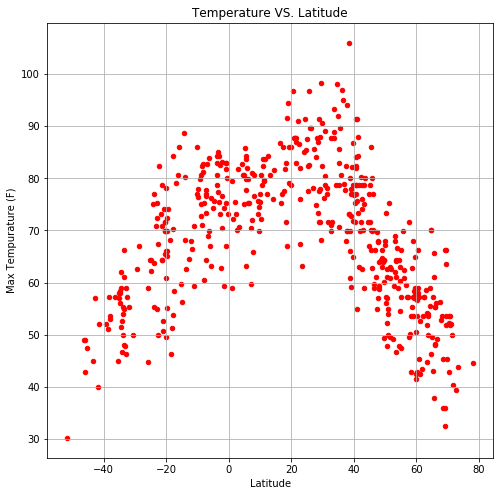

In [18]:
temlat = rcity[['Max Tempurature (F)','Latitude','Date']]

temlat.plot(kind='scatter',x = 'Latitude',y = 'Max Tempurature (F)',
            color = 'red', grid = True,figsize= (8,8))
plt.title(f"Temperature VS. Latitude")
plt.show()

## Latitude vs. Humidity Plot

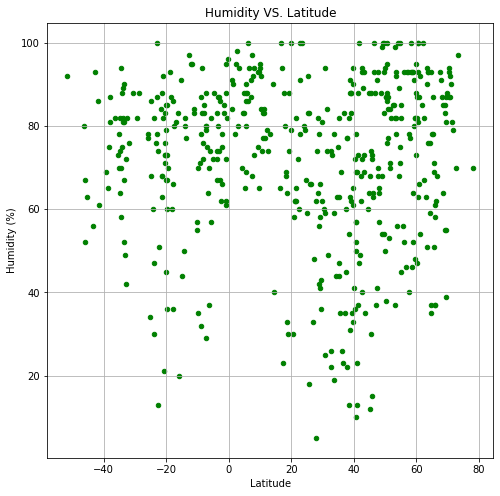

In [19]:
humlat = rcity[['Humidity (%)','Latitude']]

humlat.plot(kind='scatter',x = 'Latitude',y = 'Humidity (%)',
            color = 'green', grid = True,figsize= (8,8))
plt.title("Humidity VS. Latitude")
plt.show()

## Latitude vs. Cloudiness Plot

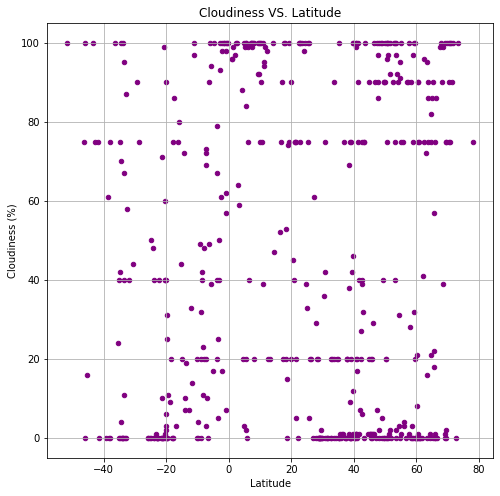

In [20]:
clolat = rcity[['Cloudiness (%)','Latitude']]

clolat.plot(kind='scatter',x = 'Latitude',y = 'Cloudiness (%)',
            color = 'purple', grid = True,figsize= (8,8))
plt.title("Cloudiness VS. Latitude")
plt.show()

## Latitude vs. Wind Speed Plot

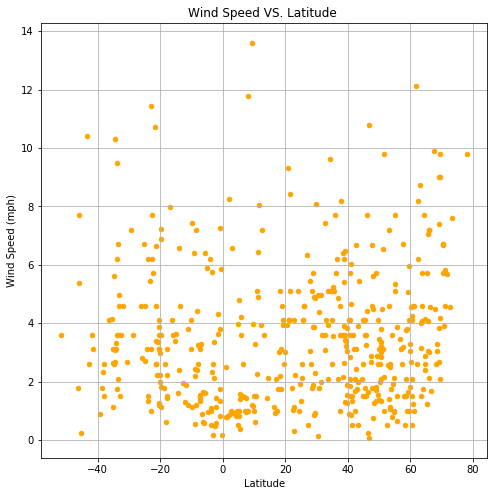

In [21]:
clolat = rcity[['Wind Speed (mph)','Latitude']]

clolat.plot(kind='scatter',x = 'Latitude',y = 'Wind Speed (mph)',
            color = 'orange', grid = True,figsize= (8,8))
plt.title("Wind Speed VS. Latitude ")
plt.show()

## Linear Regression

The Corr coefficient is -0.706


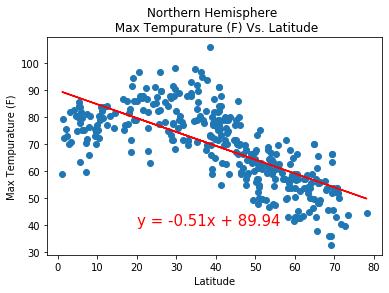

The Corr coefficient is 0.753


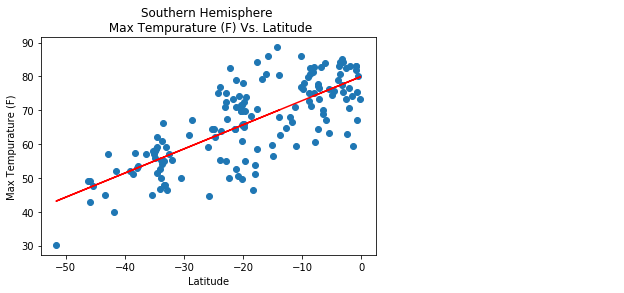

The Corr coefficient is -0.706


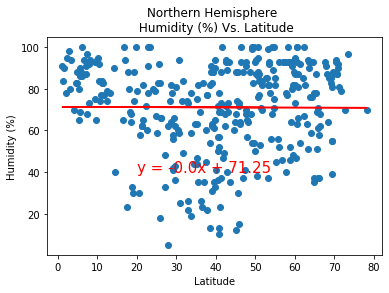

The Corr coefficient is 0.753


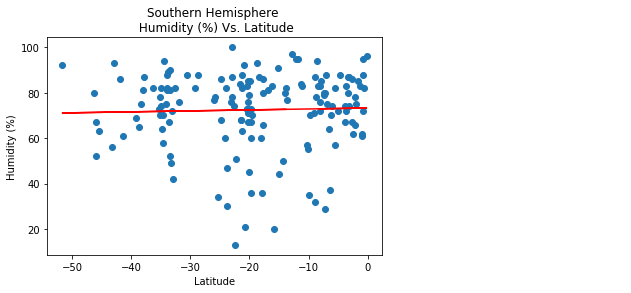

The Corr coefficient is -0.706


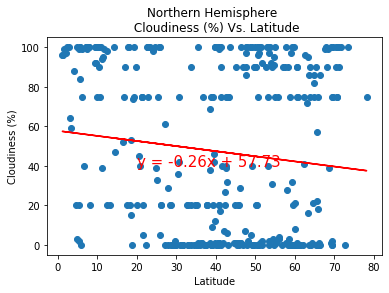

The Corr coefficient is 0.753


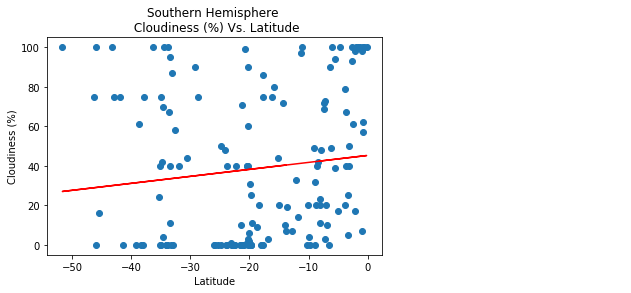

The Corr coefficient is -0.706


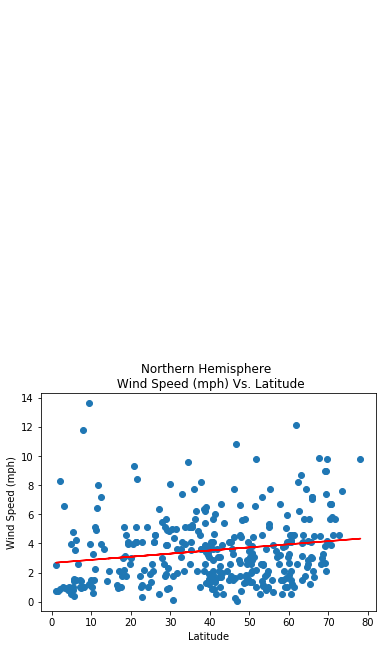

The Corr coefficient is 0.753


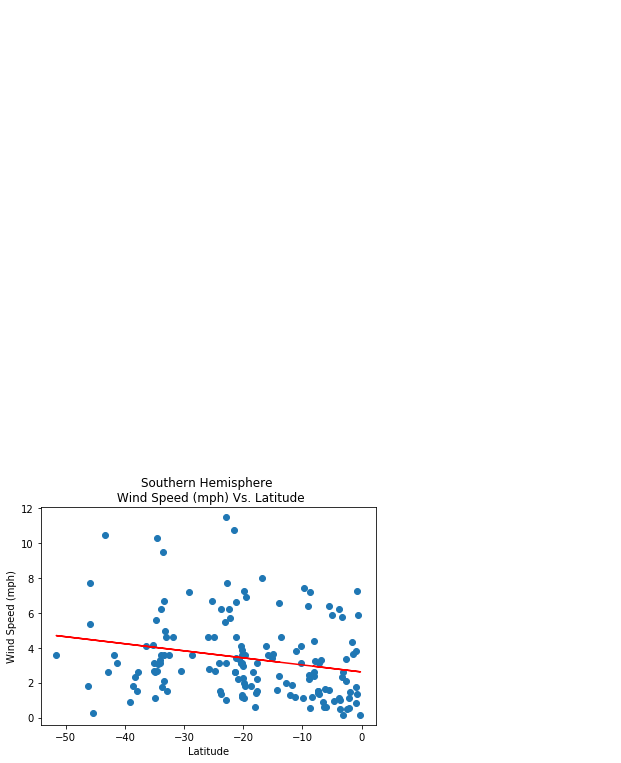

In [24]:
# OPTIONAL: Create a function to create Linear Regression plots
# Create Northern and Southern Hemisphere DataFrames
count = 0
items = ['Max Tempurature (F)','Max Tempurature (F)','Humidity (%)','Humidity (%)',
        'Cloudiness (%)','Cloudiness (%)','Wind Speed (mph)','Wind Speed (mph)']
for i in items:
    if (count %2) ==0:
        Nlat = rcity.loc[temlat['Latitude'].gt(0)==True]
        area = 'North'
    else:
        Nlat = rcity.loc[temlat['Latitude'].gt(0)==False]
        area = 'South'
    Nlat = pd.DataFrame(Nlat)
    Nlat['Latitude']  = pd.to_numeric(Nlat['Latitude'])
    Nlat = pd.DataFrame(Nlat)
    Nlat[i]  = pd.to_numeric(Nlat[i])
    Nlat = pd.DataFrame(Nlat)
    
    count += 1
    
    Corlat = Nlat.corr()
    corlat = round(Corlat['Latitude'][1],3)
    print(f'The Corr coefficient is {corlat}')
      
    x_values = Nlat['Latitude']
    y_values = Nlat[i]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(20,40),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(i)
    plt.title(f'{area}ern Hemisphere \n {i} Vs. Latitude')
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The Corr coefficient is -0.727


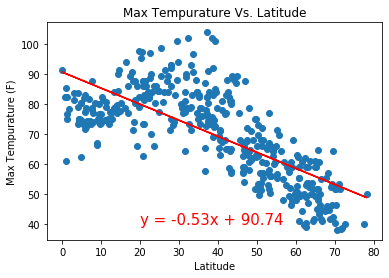

In [17]:

Nlat = temlat.loc[temlat['Latitude'].gt(0)==True]
Nlat = pd.DataFrame(Nlat)
Nlat['Latitude']  = pd.to_numeric(Nlat['Latitude'])
Nlat = pd.DataFrame(Nlat)
Nlat['Max Tempurature (F)']  = pd.to_numeric(Nlat['Max Tempurature (F)'])
Nlat = pd.DataFrame(Nlat)

Corlat = Nlat.corr()
corlat = round(Corlat['Latitude'][0],3)
print(f'The Corr coefficient is {corlat}')
      
x_values = Nlat['Latitude']
y_values = Nlat['Max Tempurature (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Tempurature (F)')
plt.title('Max Tempurature Vs. Latitude')
plt.show()